In [2]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0 

In [4]:
y_train_encoded = to_categorical(y_train, 10)
y_test_encoded = to_categorical(y_test, 10)


In [5]:
def build_vgg16_model():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    base_model.trainable = False  # Freeze base model
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(10, activation='softmax')  # 10 classes for CIFAR-10
    ])
    return model


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D

def build_lenet_model():
    model = Sequential([
        Conv2D(6, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D(),
        Conv2D(16, (3, 3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(120, activation='relu'),
        Dense(84, activation='relu'),
        Dense(10, activation='softmax')  # 10 classes for CIFAR-10
    ])
    return model

In [7]:
def compile_and_train(model, learning_rate, batch_size, epochs=5):
    model.compile(optimizer=Adam(learning_rate=learning_rate), 
                    loss='categorical_crossentropy', 
                    metrics=['accuracy'])
    history = model.fit(X_train, y_train_encoded, validation_data=(X_test, y_test_encoded), 
                        epochs=epochs, batch_size=batch_size, verbose=1)
    return history



In [8]:
def plot_metrics(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    ax1.plot(history.history['loss'], label='Training Loss')
    ax1.plot(history.history['val_loss'], label='Validation Loss')
    ax1.set_title('Loss')
    ax1.legend()
    
    ax2.plot(history.history['accuracy'], label='Training Accuracy')
    ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax2.set_title('Accuracy')
    ax2.legend()
    plt.show()

In [10]:
print("Evaluating VGG16 on CIFAR-10")
vgg16_model = build_vgg16_model()
vgg16_history = compile_and_train(vgg16_model, learning_rate=0.001, batch_size=32, epochs=2)
plot_metrics(vgg16_history)





Evaluating VGG16 on CIFAR-10
Epoch 1/2
 116/1563 ━━━━━━━━━━━━━━━━━━━━ 3:52 160ms/step - accuracy: 0.2285 - loss: 2.1397

KeyboardInterrupt: 

Evaluating LeNet on CIFAR-10


/Users/saisrithaja/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3463 - loss: 1.7646 - val_accuracy: 0.4833 - val_loss: 1.4227
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5280 - loss: 1.3220 - val_accuracy: 0.5642 - val_loss: 1.2347


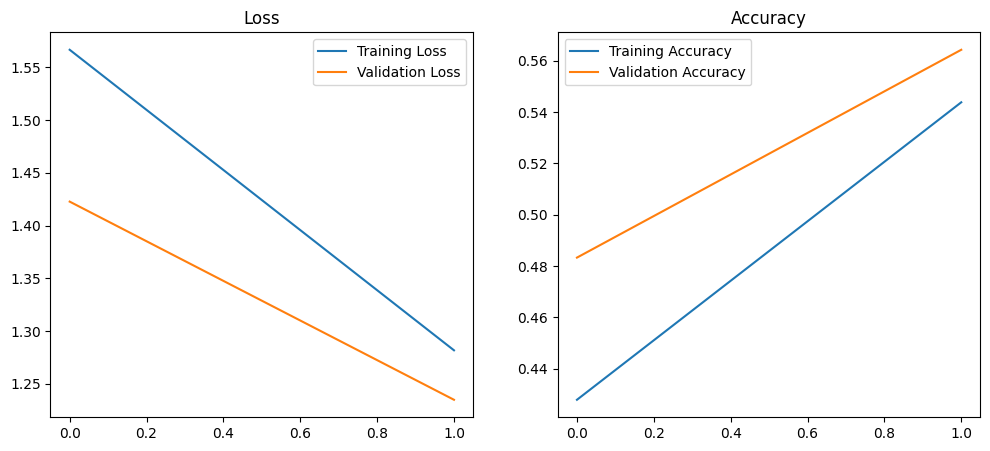

In [9]:
print("Evaluating LeNet on CIFAR-10")
lenet_model = build_lenet_model()
lenet_history = compile_and_train(lenet_model, learning_rate=0.001, batch_size=32, epochs=2)
plot_metrics(lenet_history)

In [ ]:
for model, name in [(vgg16_model, "VGG16"), (lenet_model, "LeNet")]:
    test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
    print(f"{name} Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

    y_pred = np.argmax(model.predict(X_test), axis=-1)
    y_true = np.argmax(y_test_encoded, axis=-1)
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=[f'Class {i}' for i in range(10)], 
                yticklabels=[f'Class {i}' for i in range(10)])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{name} Confusion Matrix")
    plt.show()